In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Part 1: Matplotlib

## 1. Create a line plot comparing total population over time

In [2]:
# Load the data - Choose five countires
data = {}
countries = []
for country in countries:
    data[country] = pd.read_csv(f'ddf--datapoints--population--by--country--age--gender--year/{country}')


In [3]:
# Load data for different countries using pandas and store it in a dictionary
data = {}
countries = ['jpn','ita','pak','sau','usa']
# Make a dictionary of datasets
for country in countries:
    data[country] = pd.read_csv(f'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{country}--age--gender--year.csv')

In [4]:
# Create the dataframe from the dictionary
df = pd.concat(data.values())

In [5]:
df.head(10)

,country,age,gender,year,population
0,jpn,0,1,1950,1209499
1,jpn,0,1,1951,1154536
2,jpn,0,1,1952,1069042
3,jpn,0,1,1953,1002245
4,jpn,0,1,1954,945073
5,jpn,0,1,1955,912452
6,jpn,0,1,1956,884170
7,jpn,0,1,1957,841167
8,jpn,0,1,1958,836551
9,jpn,0,1,1959,851029


In [6]:
df['country'].unique()

array(['jpn', 'ita', 'pak', 'sau', 'usa'], dtype=object)

The data frame including JPN, ITA, PAK, SAU, and USA are created.

In [7]:
# Calculate the total population per year for each country
population_per_year = df.groupby(['country','year'])['population'].sum().reset_index()

In [8]:
population_per_year

,country,year,population
0,ita,1950,46391677
1,ita,1951,46751905
2,ita,1952,47018183
3,ita,1953,47410895
4,ita,1954,47832248
...,...,...,...
750,usa,2096,418800087
751,usa,2097,419461007
752,usa,2098,420095822
753,usa,2099,420702881


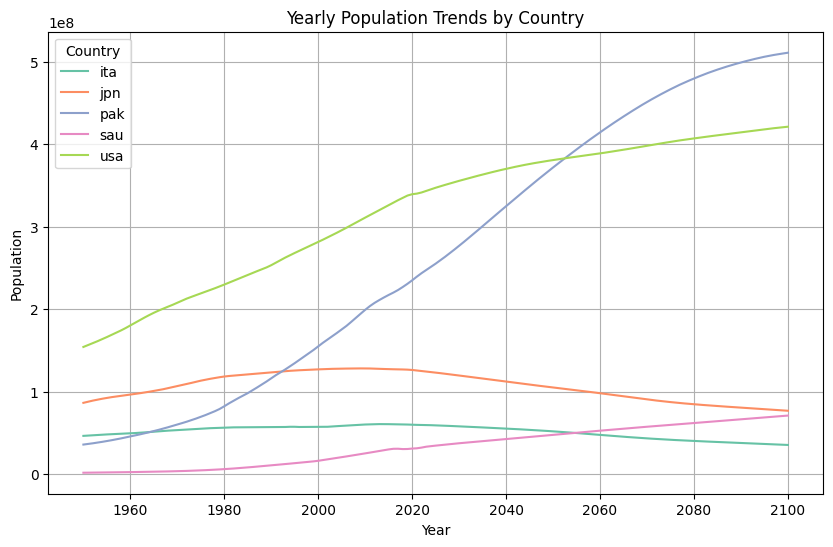

In [9]:
plt.figure(figsize=(10,6)) # Set the figure size

sns.set_palette('Set2') # Set the color palette to 'Set2'

for country in population_per_year['country'].unique():
    country_data = population_per_year[population_per_year['country']== country] # Extract the dataset for each country
    plt.plot(country_data['year'],country_data['population'], label= country) # X axis is year, Y axis is the population

plt.legend(title='Country')  # Add a title to the legend
plt.xlabel('Year')           # Label the x-axis as 'Year'
plt.ylabel('Population')      # Label the y-axis as 'Population'
plt.title('Yearly Population Trends by Country')  # Add a title to the plot
plt.grid(True)               # Add grid lines
plt.show()

## 2. Investigate demographic shifts using a stacked bar chart

## Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020

In [10]:
# Create a new column 'age_group' based on the conditions for 'age'
df['age_group'] = np.where((df['age'] >= 0) & (df['age'] <= 14), '0-14',
                  np.where((df['age'] >= 15) & (df['age'] <= 30), '15-30',
                  np.where((df['age'] >= 31) & (df['age'] <= 45), '31-45',
                  np.where((df['age'] >= 46) & (df['age'] <= 65), '46-65',
                  np.where(df['age'] >= 66, '66+', 'Unknown')))))  # 'Unknown' is for any other cases

In [11]:
# Filter the data for the required years and age groups
age_groups = ['0-14', '15-30', '31-45', '46-65', '66+']
selected_years = [1950, 1985, 2020]
age_distribution = df[df['year'].isin(selected_years) & df['age_group'].isin(age_groups)]

In [14]:
# Calculate the total population stratified year and age groups
age_group_population = age_distribution.groupby(['year', 'age_group'])['population'].sum().unstack()

In [15]:
age_group_population

age_group,0-14,15-30,31-45,46-65,66+
year,,,,,
1950,100962635,85849971,63578650,55116073,19082864
1985,135431930,136402263,108207019,97780070,47937906
2020,182422973,180042751,151288991,169726302,108165412


In [16]:
# Calculate the percentage
age_group_population_percentage = age_group_population.div(age_group_population.sum(axis=1), axis=0)

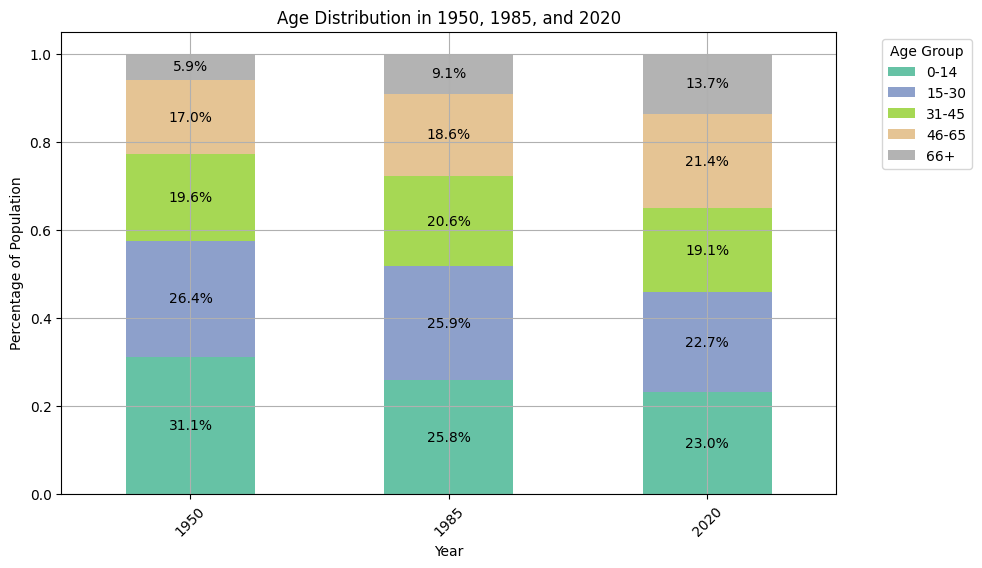

In [21]:
# Plot the stacked bar chart
ax = age_group_population_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add text annotations showing key percentages
for p in ax.patches:
    # Calculate the percentage for each bar section and annotate it
    width = p.get_width()    # Get the width of the bar
    height = p.get_height()  # Get the height (percentage) of the bar
    x = p.get_x() + width / 2  # The x position is the center of the bar
    y = p.get_y() + height / 2  # The y position is the center of the stacked section
    ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center')

# Add title, labels, and grid lines
plt.title('Age Distribution in 1950, 1985, and 2020')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.grid(True)

# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Part 2: Seaborn

## 1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.


In [22]:
# Select data for 5 countries and 2019
countries = ['jpn', 'ita', 'pak', 'sau', 'usa']
year = 2019
age_groups = ['0-14', '15-30', '31-45', '46-65', '66+']

In [24]:
# Filter the data for the selected countries, year, and age groups
analysis_data = df[(df['country'].isin(countries)) & (df['year'] == year) & (df['age_group'].isin(age_groups))]

In [25]:
# Create a pivot table for the heatmap
heatmap_data = analysis_data.pivot_table(values='population', index='country', columns='age_group', aggfunc='sum')

In [26]:
heatmap_data

age_group,0-14,15-30,31-45,46-65,66+
country,,,,,
ita,7831285,9753701,11531594,17836818,13176743
jpn,15668360,19317492,23788985,33216886,34707699
pak,87908957,68104958,38703849,27746419,8336721
sau,7847056,8596658,9072306,4284612,672180
usa,62857464,73260537,66977061,85571794,49123219


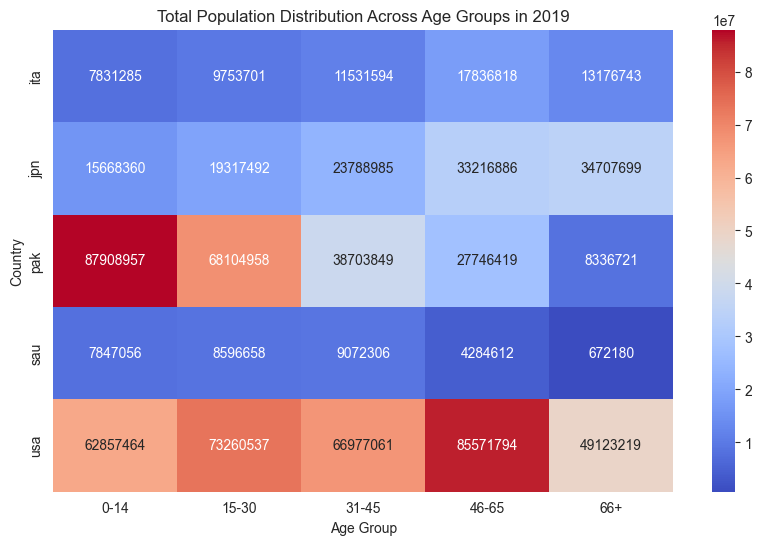

In [31]:
# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f') 
# Add title and labels
plt.title(f'Total Population Distribution Across Age Groups in 2019')
plt.xlabel('Age Group')
plt.ylabel('Country')

# Show the heatmap
plt.show()


## Summary of the results
The heatmap shows that the USA has a relatively higher population compared to other countries. Interestingly, Pakistan has the highest population in the younger age group ('0-14'). In contrast, Japan and Italy show a trend where the older population exceeds the younger population.

## 2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.

In [32]:
# Filter the data for JPN&USA and year 2020
countries = ['usa', 'jpn']
year = 2020

# Filter the data to only include the two selected countries and year 2020
data_violin = df[(df['country'].isin(countries)) & (df['year'] == year)]

C:\Users\ykatsuhara\AppData\Local\Temp\ipykernel_28660\3216347185.py:6: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.violinplot(x='country', y='age', hue='gender', data=data_violin, split=False, palette=sns.color_palette("husl", 8)) # Stratified by Gender


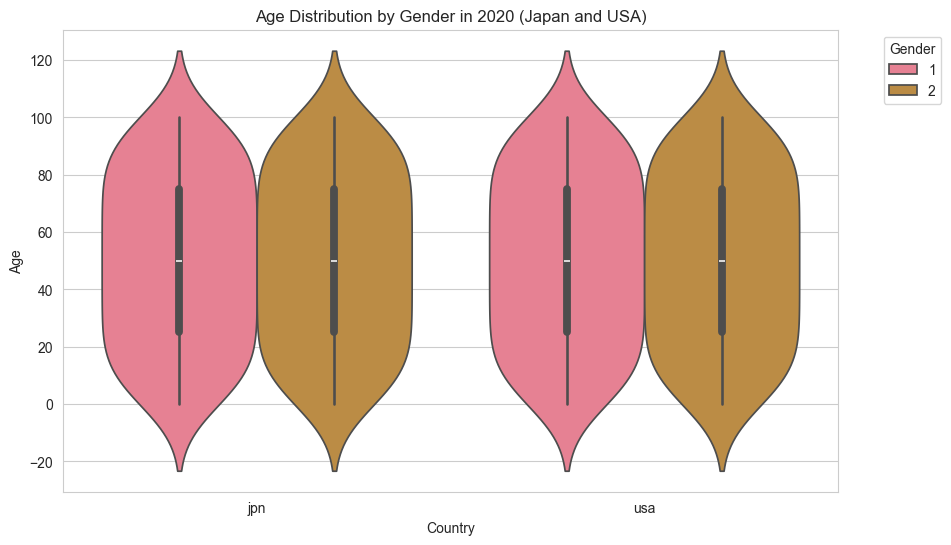

In [33]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the violin plot
sns.violinplot(x='country', y='age', hue='gender', data=data_violin, split=False, palette=sns.color_palette("husl", 8)) # Stratified by Gender

# Add title and labels
plt.title('Age Distribution by Gender in 2020 (Japan and USA)')
plt.xlabel('Country')
plt.ylabel('Age')

# Move the legend to the upper left outside the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

## Summary of the results
There is no difference in age distribution between genders, which seems implausible to me because, in general, women have a higher life expectancy in Japan.

## 3. Create a pairplot comparing population metrics across four countries

c:\Users\ykatsuhara\datasci_217\07-visualization-ykatsuhara\myenv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\ykatsuhara\datasci_217\07-visualization-ykatsuhara\myenv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\ykatsuhara\datasci_217\07-visualization-ykatsuhara\myenv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\ykatsuhara\datasci_217\07-visualization-ykatsuhara\myenv\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\ykatsuhara\datasci_217\07-visualization-ykatsuhara\myenv\Lib\site

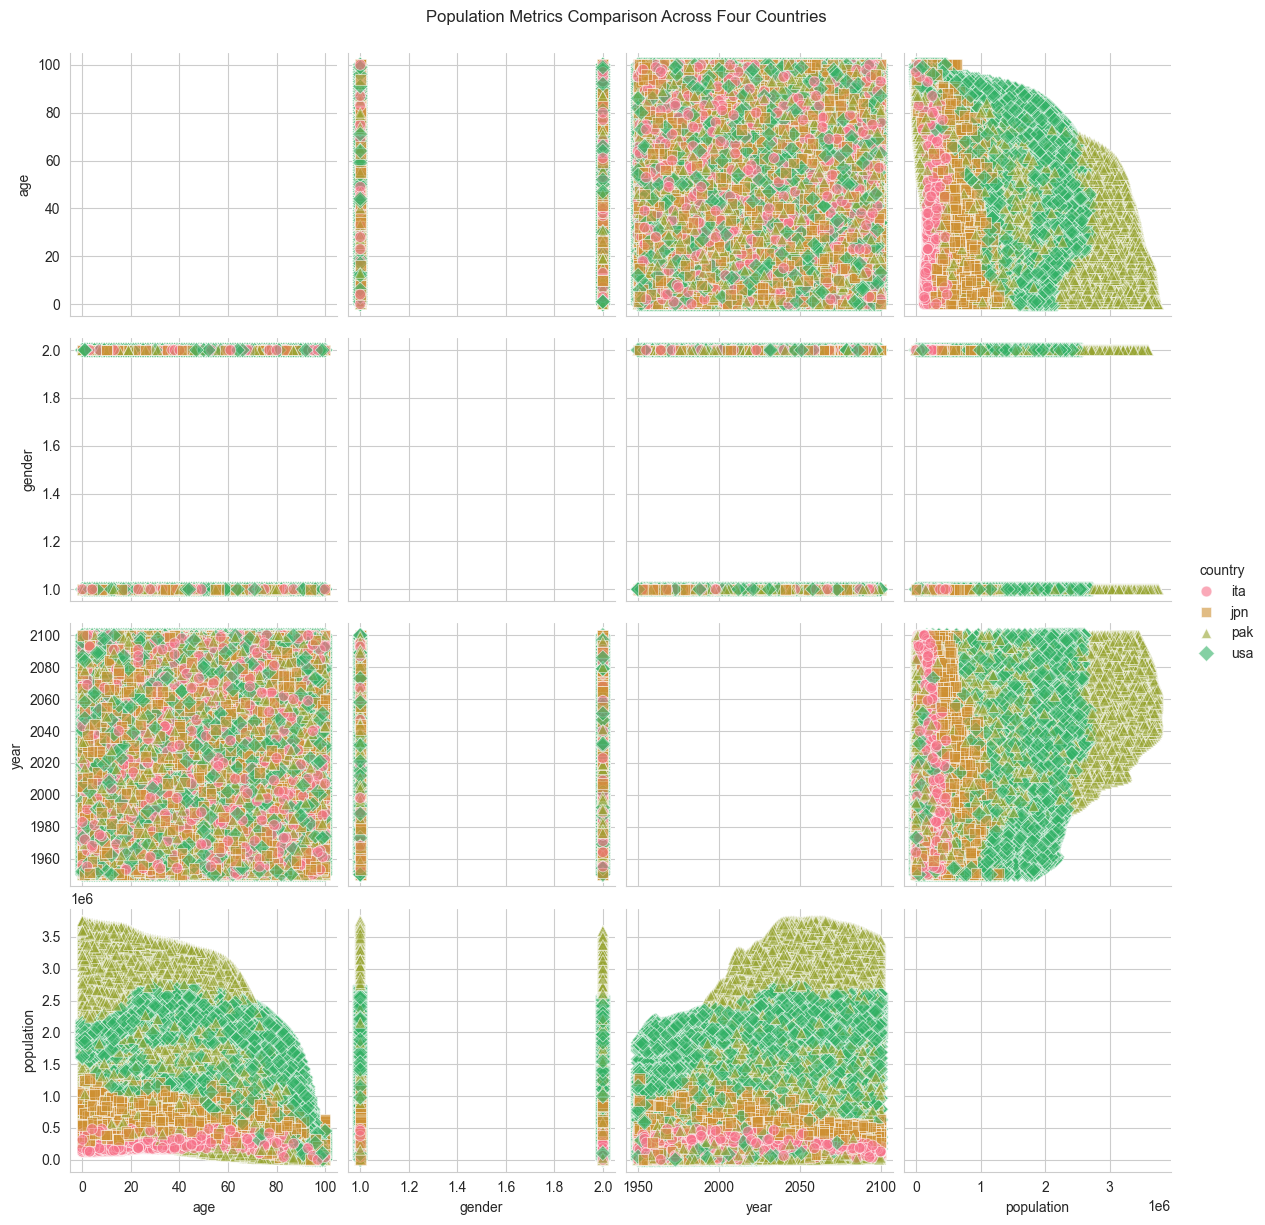

In [37]:
# Extract data for four countries
countries = ['jpn', 'ita', 'pak', 'usa']
filtered_data_pairplot = df[df['country'].isin(countries)]

# Shuffle the data to randomize the plotting order
shuffled_data = filtered_data_pairplot.sample(frac=1, random_state=42).reset_index(drop=True)

# Create a pairplot
sns.set_style("whitegrid")
sns.pairplot(shuffled_data, hue='country',diag_kind="scatter", markers=['o', 's', '^', 'D'],
             size=3, corner=False, palette=sns.color_palette("husl", 8),
             plot_kws={'s': 60, 'alpha': 0.6})  # Adjusting marker size and transparency


# Add title
plt.suptitle('Population Metrics Comparison Across Four Countries', y=1.02)
# Show the pairplot
plt.show()

## Summary of the results
The pair plots reveal several notable population trends. Firstly, Pakistan's population has experienced a marked increase since 2000, and the USA has also shown a gradual upward trend. In Pakistan, there is a significant proportion of young people, with relatively few elderly individuals over the age of 80.